In [3]:
pip install transformers datasets


In [4]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('glue', 'mrpc')
print(dataset['train'][0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .', 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .', 'label': 1, 'idx': 0}


In [5]:
from transformers import BertTokenizer, GPT2Tokenizer

# Load BERT tokenizer (WordPiece)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load GPT-2 tokenizer (BPE)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Example text
text = "Hugging Face provides state-of-the-art NLP models."

# Tokenize with BERT
bert_tokens = bert_tokenizer.tokenize(text)
bert_ids = bert_tokenizer.convert_tokens_to_ids(bert_tokens)

# Tokenize with GPT-2
gpt2_tokens = gpt2_tokenizer.tokenize(text)
gpt2_ids = gpt2_tokenizer.convert_tokens_to_ids(gpt2_tokens)

print("Text:", text)
print("BERT Tokens:", bert_tokens)
print("BERT Token IDs:", bert_ids)
print("GPT-2 Tokens:", gpt2_tokens)
print("GPT-2 Token IDs:", gpt2_ids)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Text: Hugging Face provides state-of-the-art NLP models.
BERT Tokens: ['hugging', 'face', 'provides', 'state', '-', 'of', '-', 'the', '-', 'art', 'nl', '##p', 'models', '.']
BERT Token IDs: [17662, 2227, 3640, 2110, 1011, 1997, 1011, 1996, 1011, 2396, 17953, 2361, 4275, 1012]
GPT-2 Tokens: ['Hug', 'ging', 'ĠFace', 'Ġprovides', 'Ġstate', '-', 'of', '-', 'the', '-', 'art', 'ĠN', 'LP', 'Ġmodels', '.']
GPT-2 Token IDs: [48098, 2667, 15399, 3769, 1181, 12, 1659, 12, 1169, 12, 433, 399, 19930, 4981, 13]


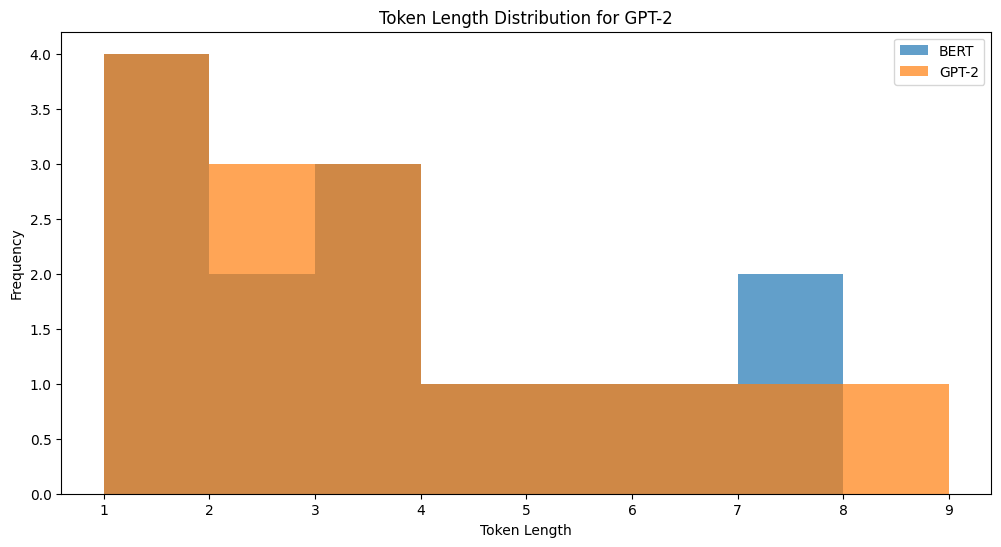

In [6]:
import matplotlib.pyplot as plt

def plot_token_lengths(tokens, tokenizer_name):
    lengths = [len(token) for token in tokens]
    plt.hist(lengths, bins=range(1, max(lengths) + 1), alpha=0.7, label=tokenizer_name)
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title(f'Token Length Distribution for {tokenizer_name}')
    plt.legend()

# Plot token lengths
plt.figure(figsize=(12, 6))
plot_token_lengths(bert_tokens, 'BERT')
plot_token_lengths(gpt2_tokens, 'GPT-2')
plt.show()
